# SAJulia Exploration


## Sobol Sensitivity Analysis

## Set Up

In [1]:
using Distributions
using VegaLite
using DataFrames

include("sobol_sequence.jl")
include("saltelli.jl")

saltelli_sample (generic function with 2 methods)

### 1. Sampling

In [2]:
# define the (uncertain) parameters of the problem and their distributions
params = SobolParams(
    ["x1", "x2", "x3"], 
    [Uniform(-3.14159265359, 3.14159265359), Uniform(-3.14159265359, 3.14159265359), 
    Uniform(-3.14159265359, 3.14159265359)]
)
N = 4

4

In [4]:
# generate samples
param_values = saltelli_sample(params, N);
param_values

20×3 Array{Float64,2}:
 -1.76101   -2.53414    0.116583
  1.38058    0.607456  -3.02501 
  2.95138   -0.96334    1.68738 
 -0.190214   2.17825   -1.45421 
  1.1106    -2.53414    0.116583
 -2.03099    0.607456  -3.02501 
  2.6814    -0.96334    1.68738 
 -0.460194   2.17825   -1.45421 
 -1.76101   -1.38058    0.116583
  1.38058    1.76101   -3.02501 
  2.95138    0.190214   1.68738 
 -0.190214  -2.95138   -1.45421 
 -1.76101   -2.53414    2.55868 
  1.38058    0.607456  -0.582913
  2.95138   -0.96334   -2.15371 
 -0.190214   2.17825    0.987884
  1.1106    -1.38058    2.55868 
 -2.03099    1.76101   -0.582913
  2.6814     0.190214  -2.15371 
 -0.460194  -2.95138    0.987884

### Sampling - Plotting


WARN Invalid field type "undefined" for channel "color", using "nominal" instead.
WARN Invalid field type "undefined" for channel "color", using "nominal" instead.


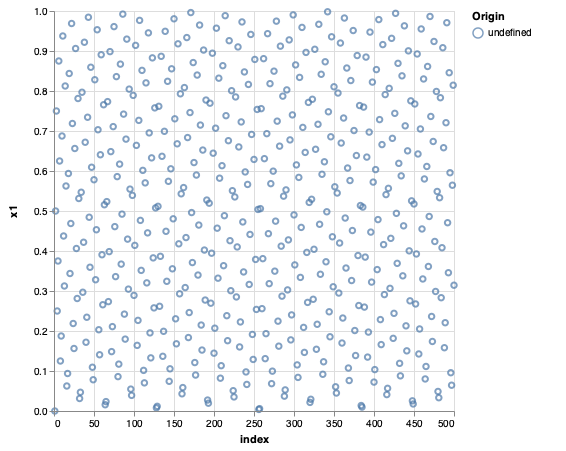

In [37]:
#distribution of sobol_sequence values
sample = sobol_sequence(N, D) |> DataFrame
indicis = DataFrame(index = 1:N)
df = [indicis sample]

df |>
@vlplot(
    :point,
    x=:index,
    y=:x1,
    color=:Origin,
    width=400,
    height=400
)


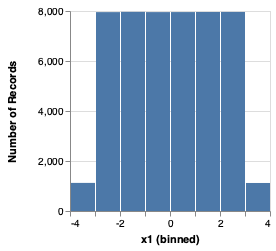

In [44]:
DataFrame(param_values) |>
@vlplot(
    :bar, 
    x={:x1, bin=true}, 
    y="count()"
)

### 2. Analyze